# Results comparison: Netlogo vs Python

- We compare simulations with 1000 agents updating their strategies in asynchronous-random-independent mode.
- Ring: Watts–Strogatz Small-World with 2 neighbors and probability of rewiring equal to 0.
- Watts–Strogatz Small-World with 4, 6, 8, 10, 20, 50 and 100 neighbors and probability of rewiring 0, 0.25, 0.5 and 1.

In [1]:
import random
import pandas as pd
import numpy as np
import sympy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

from networkx.generators.random_graphs import binomial_graph, barabasi_albert_graph, connected_watts_strogatz_graph
from networkx.generators.geometric import navigable_small_world_graph
from scipy.integrate import odeint
from os import path as _path

%matplotlib inline

# Networks

# Ring

Watts–Strogatz Small-World with 2 neighbors and probability of rewiring equal to 0.

In [2]:
n_of_agents = 100

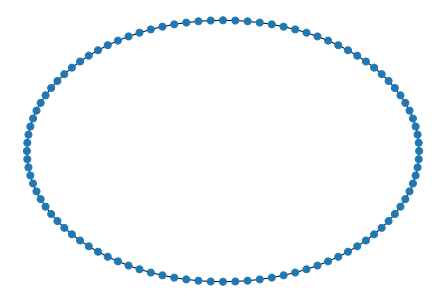

In [3]:
ring = connected_watts_strogatz_graph(n_of_agents, k=2, p=0)
nx.draw_circular(ring,  node_size=50)
plt.show()

## Barabasi-Albert

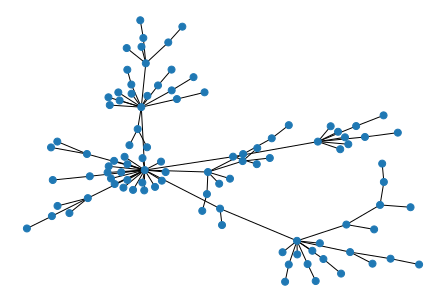

In [4]:
n_of_agents = 100
number_of_links = 1
pa = barabasi_albert_graph(n_of_agents, number_of_links)
nx.draw(pa, node_size=50)
plt.show()

# BEP

### Ring

In [5]:
ouputs_dir = "../workspace/outputs"

In [6]:
ring_file = "python_bep_5_strategies_100_runs_asynchronous_random_independent_1000_agents_0.0_noise_0.0_rewiring_sw_net_alg_2_neighbors.csv"

In [7]:
SW_NEIGHBORS_REWIRING = "python_bep_5_strategies_100_runs_asynchronous_random_independent_1000_agents_0.0_noise_{}_rewiring_sw_net_alg_{}_neighbors.csv"

In [8]:
ring = pd.read_csv(_path.join(ouputs_dir, ring_file), sep="|")

In [9]:
sw_ring = ring[ring["strategy_ratio"]==1.0].groupby("run_number", as_index=False).min()

In [10]:
sw_ring["network"] = "RING"

### Preferential Attachment 

In [11]:
pa_file = "python_bep_5_strategies_100_runs_asynchronous_random_independent_1000_agents_0.0_noise_1.0_rewiring_barabasi-albert_net_alg_0.2_prob_edge.csv"

In [12]:
pa = pd.read_csv(_path.join(ouputs_dir, pa_file), sep="|")

In [13]:
pa_net = pa[pa["strategy_ratio"]==1.0].groupby("run_number", as_index=False).min()

In [14]:
pa_net["network"] = "PA"

In [15]:
pa_net["neigbors"] = 0.2
sw_ring["neigbors"] = 0.2

In [16]:
first_hit_df = pd.concat([sw_ring, pa_net])

In [17]:
for k in [4, 6, 8, 10, 20, 50, 100]:
    for rewiring in [0.0, 0.25, 0.5, 1.0]:
        net = pd.read_csv(_path.join(ouputs_dir, SW_NEIGHBORS_REWIRING.format(rewiring, k)), sep="|")
        tmp_df = net[net["strategy_ratio"]==1.0].groupby("run_number", as_index=False).min()
        tmp_df["network"] = "sw_{}_{}".format(k, rewiring)
        tmp_df["neigbors"] = k / 100
        first_hit_df = pd.concat([first_hit_df, tmp_df])

In [18]:
first_hit_df.head()

,run_number,step,strategy_ratio,network,neigbors
0,0,288,1.0,RING,0.2
1,1,210,1.0,RING,0.2
2,2,203,1.0,RING,0.2
3,3,194,1.0,RING,0.2
4,4,169,1.0,RING,0.2


## Netlogo

<img src="netlogo_networks.png" alt="Drawing" style="width: 600px;"  align="left"/>

## Python

In [19]:
!ls ../workspace/outputs/netlogo_networks.png

ls: no se puede acceder a '../workspace/outputs/netlogo_networks.png': No existe el archivo o el directorio


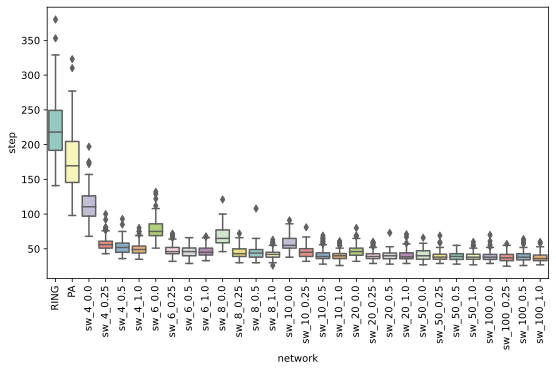

In [20]:
plt.figure(figsize=(9,5))
ax = sns.boxplot(x="network", y="step", data=first_hit_df, palette="Set3")
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)